In [1]:
# prody
import prody as pdy

# simtk
import simtk.openmm.app as app
import simtk.openmm as omm
from simtk.unit import *

from pdbfixer import PDBFixer

# BioPython
from Bio import SeqIO

import project
project.setup()

import numpy as np
from refine import *

ModuleNotFoundError: No module named 'refine'

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/semyon/mipt/GPCR-TEAM/env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cos', 'cosh', 'sinh', 'norm', 'bar', 'degrees', 'dot', 'sum', 'tan', 'radians', 'sin', 'byte', 'bytes', 'sqrt', 'tanh']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
path = "output/6awr_cB_REFINED.B99990001.pdb"

In [16]:
protein = pdy.parsePDB(path) #.select("protein and chain B")

@> 1195 atoms and 1 coordinate set(s) were parsed in 0.03s.


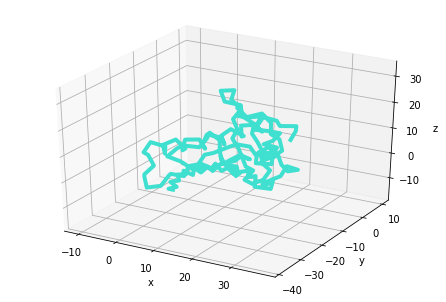

In [17]:
pdy.showProtein(protein, A='blue')
pylab.show()

In [19]:
force_field = "amber14/protein.ff14SB.xml"
create_system(path, tmp_file="output/tmp_system.pdb", forcefield_name=force_field)
t0 = time.time()
drs = DRSystem("output/tmp_system.pdb", forcefield_name=force_field)
print("construction of system:", -t0 + time.time(), "sec")
t0 = time.time()
nmw = NMSpaceWrapper(drs, n_modes=5)
print("construction of NM wrapper:", -t0 + time.time(), "sec")

@> 1195 atoms and 1 coordinate set(s) were parsed in 0.01s.


write PDB(prody): 0.0117 sec
read PDB(openmm): 0.05944061279296875 sec


@> 2400 atoms and 1 coordinate set(s) were parsed in 0.02s.


add hydrogens and extra particles(openmm): 1.5576019287109375 sec
write PDB(openmm): 0.0280914306640625 sec
construction of system: 0.39803576469421387 sec


@> Hessian was built in 11.73s.
@> 5 modes were calculated in 42.82s.


construction of NM wrapper: 54.58194327354431 sec


In [20]:
print("POSITION:\n{}".format(drs.get_position()))
print("FORCE:\n{}".format(drs.get_force()))
print("ENERGY:\n{}".format(drs.get_energy()))

POSITION:
[[ 11.205 -34.196   2.594]
 [ 10.35  -34.255   3.126]
 [ 11.912 -34.839   2.92 ]
 ...
 [ 17.966   7.841   1.022]
 [ 17.818   7.667  -0.192]
 [ 18.013   9.003   1.429]]
FORCE:
[[   19.8127405   1360.93334677  -261.34090032]
 [   12.07165403   -17.100744     -11.45969928]
 [  -42.06425992    17.13573344   -13.56551711]
 ...
 [  266.45302425   859.36778626  -773.13838755]
 [ -460.72510845 -1241.20857212  -873.12670099]
 [ -113.12680324   496.92369178  1033.64855957]]
ENERGY:
-5250.562869764324


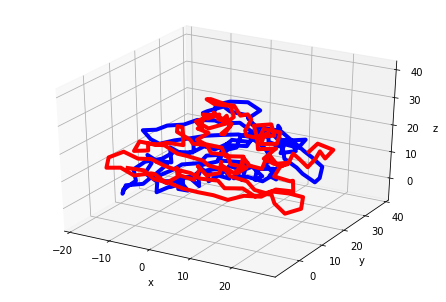

In [11]:
t = np.array([1.0, -2., 0.])
r = rotation_matrix(0, 0, 90)
nmw.set_rigid(t, r)
# pdy.showProtein(drs._ligand, A='green')
nmw.set_rigid(np.array([0, 0,  0]), rotation_matrix(0, 0, 90))
init_pos = drs.get_init_position()
curr_pos = drs.get_position()
pdy.showProtein(drs._ligand_init, A='blue', linewidth=1)
pdy.showProtein(drs._ligand, A='red', width=1)
pylab.show()
# for i in range(len(init_pos)):
#     print("offset:", curr_pos[i] - init_pos[i])